## 13.2 自然语言处理常用工具

### 13.2.1 NLTK

#### （1）安装 NLTK

In [6]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /Users/yif/n

[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/yif/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to /Users/yif/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[

True

#### （2）NLTK 常用模块

In [7]:
from nltk.corpus import gutenberg

print(gutenberg.words('austen-emma.txt')[:9])

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I']


In [8]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('running'))

run


In [9]:
from nltk.tokenize import word_tokenize

print(word_tokenize("Hello, how are you?"))

['Hello', ',', 'how', 'are', 'you', '?']


In [11]:
from nltk import pos_tag, word_tokenize

print(pos_tag(word_tokenize("I love Python")))

[('I', 'PRP'), ('love', 'VBP'), ('Python', 'NNP')]


In [12]:
from nltk.chunk import ne_chunk
tree = ne_chunk(pos_tag(word_tokenize("Donald Trump is the president.")))
tree.pretty_print()

                   S                                  
   ________________|___________________________        
  |      |         |        |    PERSON   ORGANIZATION
  |      |         |        |      |           |       
is/VBZ the/DT president/NN ./. Donald/NNP  Trump/NNP  



#### （3）NLTK 应用示例

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk import pos_tag
import string

# 示例文本
text = "How are you doing today? you are learning NLP today."

# 1. 分句
sentences = sent_tokenize(text)
print("分句:", sentences)

# 2. 分词
words = word_tokenize(text)
print("分词:", words)

# 3. 去除标点符号
words_no_punctuation = [word for word in words if word not in string.punctuation]
print("去除标点符号:", words_no_punctuation)

# 4. 词干还原
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in words_no_punctuation]
print("词干还原:", stems)

# 5. 词性标注
pos_tags = pos_tag(words_no_punctuation)
print("词性标注:", pos_tags)

# 6. 词频统计
fdist = FreqDist(words_no_punctuation)
print("词频统计:", fdist)

# 输出词频最高的10个单词
print("前5高频词:", fdist.most_common(5))

分句: ['How are you doing today?', 'you are learning NLP today.']
分词: ['How', 'are', 'you', 'doing', 'today', '?', 'you', 'are', 'learning', 'NLP', 'today', '.']
去除标点符号: ['How', 'are', 'you', 'doing', 'today', 'you', 'are', 'learning', 'NLP', 'today']
词干还原: ['how', 'are', 'you', 'do', 'today', 'you', 'are', 'learn', 'nlp', 'today']
词性标注: [('How', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('doing', 'VBG'), ('today', 'NN'), ('you', 'PRP'), ('are', 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP'), ('today', 'NN')]
词频统计: <FreqDist with 7 samples and 10 outcomes>
前5高频词: [('are', 2), ('you', 2), ('today', 2), ('How', 1), ('doing', 1)]


### 13.2.2 Jieba 分词

In [14]:
import jieba
print(jieba.__version__)

0.42.1


#### （2）Jieba 的分词

In [15]:
import jieba

# 普通分词（精确模式）
sentence = "我是一名武汉大学信息管理学院的学生"
result = jieba.cut(sentence)
print("精确模式:", "/".join(result))

# 全模式分词
result_all = jieba.cut(sentence, cut_all=True)
print("全模式:", "/".join(result_all))

# 使用 HMM
result_hmm = jieba.cut(sentence, HMM=True)
print("HMM 模式:", "/".join(result_hmm))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/5r/nlcyxyvn0qbfvsvgrb49bzx00000gn/T/jieba.cache
Loading model cost 0.477 seconds.
Prefix dict has been built successfully.


精确模式: 我/是/一名/武汉大学/信息管理/学院/的/学生
全模式: 我/是/一名/武汉/武汉大学/大学/信息/信息管理/管理/管理学/理学/理学院/学院/的/学生
HMM 模式: 我/是/一名/武汉大学/信息管理/学院/的/学生


In [16]:
# 搜索引擎分词模式
sentence = "小明硕士毕业于武汉大学信息管理学院，后在英国伦敦大学深造。"
result = jieba.cut_for_search(sentence)
print("搜索引擎模式分词:", "/".join(result))

搜索引擎模式分词: 小明/硕士/毕业/于/武汉/大学/武汉大学/信息/管理/信息管理/学院/，/后/在/英国/伦敦/大学/英国伦敦大学/深造/。


In [17]:
sentence = "我是一名武汉大学的学生"

# 精确模式分词
result = jieba.lcut(sentence, cut_all=False)
print("精确模式:", result)

# 全模式分词
result = jieba.lcut(sentence, cut_all=True)
print("全模式:", result)

精确模式: ['我', '是', '一名', '武汉大学', '的', '学生']
全模式: ['我', '是', '一名', '武汉', '武汉大学', '大学', '的', '学生']


#### （2）载入自定义词典

In [18]:
from jieba import Tokenizer
  
# 创建一个独立的分词器实例
custom_tokenizer = Tokenizer(dictionary='userdic.txt')
sentence = "哈利波特大声言道，'霍格沃茨人生而自由'"

print("默认分词器结果:", "/ ".join(jieba.cut(sentence)))
print("用户分词器结果:", "/ ".join(custom_tokenizer.lcut(sentence)))

Building prefix dict from /Users/yif/Desktop/Python第2版/JupyterCode25/chapter_13_code/userdic.txt ...
Dumping model to file cache /var/folders/5r/nlcyxyvn0qbfvsvgrb49bzx00000gn/T/jieba.ud0659b445abc825977b356f2806fcfe7.cache
Loading model cost 0.003 seconds.
Prefix dict has been built successfully.


默认分词器结果: 哈利波/ 特大/ 声言/ 道/ ，/ '/ 霍格/ 沃茨/ 人/ 生而自由/ '
用户分词器结果: 哈利波特/ 大声言道/ ，/ '/ 霍格沃茨/ 人生/ 而/ 自由/ '


In [22]:
# 动态添加新词
jieba.add_word('哈利波特')
jieba.add_word('霍格沃茨', freq=1000, tag='nz')

# 测试分词
sentence = "哈利波特大声言道：霍格沃茨人生而自由"
print("添加新词分词结果:", "/ ".join(jieba.cut(sentence)))

添加新词分词结果: 哈利波特/ 大声/ 言道/ ：/ 霍格沃茨/ 人/ 生而自由


In [20]:
# 删除新词
jieba.del_word('哈利波特')
print("删除新词分词结果:", "/ ".join(jieba.cut(sentence)))

删除新词分词结果: 哈利波/ 特大/ 声言/ 道/ ：/ 霍格沃茨/ 人/ 生而自由


#### （4）关键词提取

- **基于 TF-IDF 的关键词提取**

In [23]:
import jieba.analyse

text = "哈利波特是一个很受欢迎的小说角色，他的故事发生在霍格沃茨魔法学校。"
# 提取关键词（提取前 5 个关键词）
keywords = jieba.analyse.extract_tags(text, topK=5, withWeight=True)

for word, weight in keywords:
    print(f"{word}: {weight}")

哈利波特: 1.19547675029
霍格沃茨: 1.19547675029
魔法: 1.02117981979
受欢迎: 0.859737274392
角色: 0.702235118368


- **基于 TextRank 的关键词提取**

In [24]:
text = "哈利波特是一个很受欢迎的小说角色，他的故事发生在霍格沃茨魔法学校。"
# 使用 TextRank 提取关键词
keywords = jieba.analyse.textrank(text, topK=5, withWeight=True)

for word, weight in keywords:
    print(f"{word}: {weight}")

角色: 1.0
魔法: 0.9334646556201724
故事: 0.9312475051629481
发生: 0.9235357902376684
小说: 0.6918218533418313


#### （5）词性标注

In [25]:
import jieba.posseg as pseg

sentence = "哈利波特正在学习中文自然语言处理。"   # 输入的中文句子
# 使用 pseg.cut() 进行分词和词性标注
words = pseg.cut(sentence, HMM=True)

# 输出每个词和词性
for word, flag in words:
    print(f"{word}: {flag}")

哈利波特: x
正在: t
学习: v
中文: nz
自然语言: l
处理: v
。: x


## 13.3 文本预处理实践

### 13.3.1 文本数据的收集与读入

In [26]:
import requests
from bs4 import BeautifulSoup   # 导入所需的库

# 1. 发送 HTTP 请求到目标网页
url = "https://www.baidu.com"  # 以百度为例
response = requests.get(url)

# 2. 手动设置编码（从网页的内容自动检测编码）
response.encoding = response.apparent_encoding  # 自动检测编码并设置

# 3. 使用 BeautifulSoup 解析 HTML 内容
soup = BeautifulSoup(response.text, "html.parser")

# 提取网页标题
title = soup.title.string
print(f"网页标题: {title}")
# 提取网页中的所有超链接
print("网页中的链接：")
for link in soup.find_all("a"):
    href = link.get("href")
    if href:
        print(href)

网页标题: 百度一下，你就知道
网页中的链接：
http://news.baidu.com
https://www.hao123.com
http://map.baidu.com
http://v.baidu.com
http://tieba.baidu.com
http://www.baidu.com/bdorz/login.gif?login&tpl=mn&u=http%3A%2F%2Fwww.baidu.com%2f%3fbdorz_come%3d1
//www.baidu.com/more/
http://home.baidu.com
http://ir.baidu.com
http://www.baidu.com/duty/
http://jianyi.baidu.com/


In [27]:
# 读入数据文件
content = open('hlm.txt').read()
content[:99]      #显示部分数据内容

'    上卷 第一回  甄士隐梦幻识通灵\u3000贾雨村风尘怀闺秀\n此开卷第一回也．作者自云：因曾历过一番梦幻之后，故将真事隐去，而借"通灵"之说，撰此《石头记》一书也．故曰"甄士隐"云云．但书中所记何事何'

### 13.3.2 文本清洗

In [28]:
import re

with open('hlm.txt', 'r', encoding='utf-8') as file:   # 读取全文内容
    text = file.read()
# 数据清理：去除特殊字符、空格和换行符
cleaned_text = re.sub(r'[^\u4e00-\u9fa5]', '', text)

print(cleaned_text[:99])    # 输出清理后的文本内容前100个字符

上卷第一回甄士隐梦幻识通灵贾雨村风尘怀闺秀此开卷第一回也作者自云因曾历过一番梦幻之后故将真事隐去而借通灵之说撰此石头记一书也故曰甄士隐云云但书中所记何事何人自又云今风尘碌碌一事无成忽念及当日所有之女


### 13.2.3 去停用词

In [30]:
#分词
seg_list = list(jieba.cut(cleaned_text))
print("分词结果: \n","/".join(seg_list[:99]))     #显示部分分词结果

分词结果: 
 上卷/第一回/甄士隐/梦幻/识通灵/贾雨村/风尘/怀/闺秀/此/开卷/第一回/也/作者/自云因/曾/历过/一番/梦幻/之后/故/将/真事/隐去/而/借/通灵之/说/撰此/石头记/一书/也/故曰/甄士隐/云云/但书中/所记/何事/何人/自/又/云今/风尘碌碌/一事无成/忽/念及/当日/所有/之/女子/一一/细考/较/去/觉/其/行止/见识/皆/出于/我/之上/何/我/堂堂/须眉/诚不若/彼/裙钗/哉/实愧/则/有余/悔/又/无益/之大/无可如何/之日/也/当此/则/自欲/将/已往/所赖/天恩祖/德/锦衣/纨绔/之/时/饫甘餍肥/之日/背/父兄/教育/之恩负/师友


In [31]:
#加载停用词表
stopwords = []
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().split('\n')     #字符串按'\n'分割，构建列表类型    
print("停用词: ",",".join(stopwords[:20]))   #显示部分停用词，第一个为空格

停用词:   ,?,、,。,“,”,《,》,！,，,：,；,？,同志们,同时,啊,阿,哎,哎呀,哎哟


In [32]:
# 去除停用词
filtered_words = [word for word in seg_list if word not in stopwords]
print("去除停用词结果:\n","/".join(filtered_words[:99]))     #显示部分处理结果

去除停用词结果:
 上卷/第一回/甄士隐/梦幻/识通灵/贾雨村/风尘/怀/闺秀/开卷/第一回/作者/自云因/曾/历过/一番/梦幻/之后/真事/隐去/通灵之/说/撰此/石头记/一书/故曰/甄士隐/但书中/所记/何事/何人/云今/风尘碌碌/一事无成/忽/念及/当日/所有/女子/一一/细考/觉/行止/见识/皆/出于/之上/堂堂/须眉/诚不若/裙钗/实愧/有余/悔/无益/之大/无可如何/之日/当此/自欲/已往/所赖/天恩祖/德/锦衣/纨绔/时/饫甘餍肥/之日/背/父兄/教育/之恩负/师友/规谈/之德/今日/一技无成/半生/潦倒/之罪/编述/一集/以告/天下人/罪固/闺阁/中本/历历/有人/万/不可/不肖/自护己/短/一并/使/泯灭/今日


## 13.4 关键词提取实践

### 13.4.1 词频分析

In [33]:
#使用 counter 做词频统计，选取出现频率前 500 的词汇
from collections import Counter
counting_words = Counter(filtered_words)         #词频统计
common_words = counting_words.most_common(20)    #取前20个高频词汇
print("前 20 个高频词:\n", common_words)

前 20 个高频词:
 [('道', 6312), ('说', 5899), ('宝玉', 3729), ('人', 2951), ('笑', 2431), ('听', 1785), ('好', 1549), ('一个', 1448), ('只', 1332), ('贾母', 1195), ('倒', 1105), ('忙', 1017), ('王夫人', 990), ('说道', 974), ('知道', 967), ('老太太', 966), ('吃', 946), ('姑娘', 938), ('罢', 934), ('凤姐', 934)]


### 13.4.2 基于 TF-IDF 的关键词提取实践

In [34]:
#TF-IDF算法提取关键词，提取前 200 个关键词
key_words_TFIDF = jieba.analyse.extract_tags(text, topK=200, withWeight=True)
key_words_TFIDF[:5]

[('宝玉', 0.11205872014213691),
 ('贾母', 0.04082268286688593),
 ('凤姐', 0.03700087942811271),
 ('王夫人', 0.033906605896934894),
 ('老太太', 0.030096196986483813)]

### 13.4.3 基于 TextRank 的关键词提取实践

In [35]:
#TextRank算法提取关键词，提取前 200 个关键词
key_words_TR = jieba.analyse.textrank(content,topK=200,withWeight=True)
key_words_TR[:5]

[('只见', 1.0),
 ('起来', 0.9627771460134334),
 ('出来', 0.9612051038582181),
 ('姑娘', 0.9343101979726104),
 ('众人', 0.9195841547535883)]

## 13.5 词云构建实践

### 13.5.1 数据与工具准备

In [38]:
import jieba
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from imageio import imread
from collections import Counter
import numpy as np
import re

### 13.5.2 数据预处理

（1）数据清理

In [39]:
import jieba
import re

# 读取文本数据
with open("hlm.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

clean_text = re.sub(r'[^\u4e00-\u9fa5]', '', raw_text) # 文本清洗,仅保留中文字符
seg_list = jieba.lcut(clean_text, cut_all=False)       # 分词

with open("stopwords.txt", "r", encoding="utf-8") as f:   # 加载停用词表
    stop_words = set(f.read().splitlines())
# 去停用词
filtered_words = [word for word in seg_list if word not in stop_words and len(word) > 1]

print("数据清理后的文本(部分)：\n",filtered_words[:20])

数据清理后的文本(部分)：
 ['上卷', '第一回', '甄士隐', '梦幻', '识通灵', '贾雨村', '风尘', '闺秀', '开卷', '第一回', '作者', '自云因', '历过', '一番', '梦幻', '之后', '真事', '隐去', '通灵之', '撰此']


In [40]:
# 输出清洗后的文本序列
with open("hlm_processed.txt", "w", encoding="utf-8") as output:
    output.write(" ".join(filtered_words))

（2）词频统计

In [41]:
#使用 counter 做词频统计，选取出现频率前 500 的词汇
counting_words = Counter(filtered_words).most_common(500)
print("前 20 高频词：\n",counting_words[:20])

前 20 高频词：
 [('宝玉', 3729), ('一个', 1448), ('贾母', 1195), ('王夫人', 990), ('说道', 974), ('知道', 967), ('老太太', 966), ('姑娘', 938), ('凤姐', 934), ('众人', 870), ('一面', 829), ('太太', 825), ('只见', 789), ('奶奶', 771), ('两个', 770), ('不知', 701), ('听见', 689), ('贾琏', 634), ('告诉', 602), ('东西', 596)]


（3）关键词提取

In [42]:
import jieba.analyse
# 提取数据清理后的文本
with open("hlm_processed.txt", "r", encoding="utf-8") as file:
    filtered_text = file.read()

#TF-IDF算法提取关键词，提取前 500 个关键词
key_words_TFIDF = jieba.analyse.extract_tags(filtered_text, topK=500, withWeight=True)

print("前 20 的关键词：\n",key_words_TFIDF[:20])

前 20 的关键词：
 [('宝玉', 0.13449602924731202), ('贾母', 0.047922789023698814), ('王夫人', 0.040053397536970556), ('凤姐', 0.03789982818513017), ('老太太', 0.03630635287835356), ('太太', 0.02912265297503258), ('姑娘', 0.028884891239639637), ('奶奶', 0.02815540869354501), ('贾琏', 0.027848753035573173), ('众人', 0.026179747857417692), ('说道', 0.02600407564820544), ('平儿', 0.025849409168918917), ('一面', 0.0252464220127418), ('只见', 0.023263399300224658), ('听见', 0.021106627017390075), ('一个', 0.02109935668665115), ('凤姐儿', 0.02076790138357588), ('薛姨妈', 0.02022101361611444), ('丫头', 0.020039743681443564), ('知道', 0.019874447710408458)]


### 13.5.3 词云生成

In [43]:
# 读入云形状的背景图片
backgroud_pic = imread('cloud.jpg')  # 背景图片路径

# 配置词云参数
wc = WordCloud(
    background_color='white',  # 背景色为白色
    mask=backgroud_pic,      # 使用云形状的背景图片
    font_path='simhei.ttf',  # 字体路径，确保有中文支持
    max_words=500,           # 设置最大显示的字数
    max_font_size=100,       # 设置字体最大值
    margin=1,                # 设置词间的间距
    random_state=5,          # 设置随机种子，以生成不同的配色方案
    scale=1,                    # 画布的比例
    contour_color='lightblue',  # 设置轮廓颜色
    contour_width=1             # 轮廓宽度
)

/var/folders/5r/nlcyxyvn0qbfvsvgrb49bzx00000gn/T/ipykernel_12005/2182268741.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  backgroud_pic = imread('cloud.jpg')  # 背景图片路径


In [44]:
# 生成词云并从字典中加载关键词和对应的TF-IDF值
wc.generate_from_frequencies(dict(key_words_TFIDF))  # 从字典生成词云
# 保存生成的词云图片
wc.to_file("myWordCloud.png")

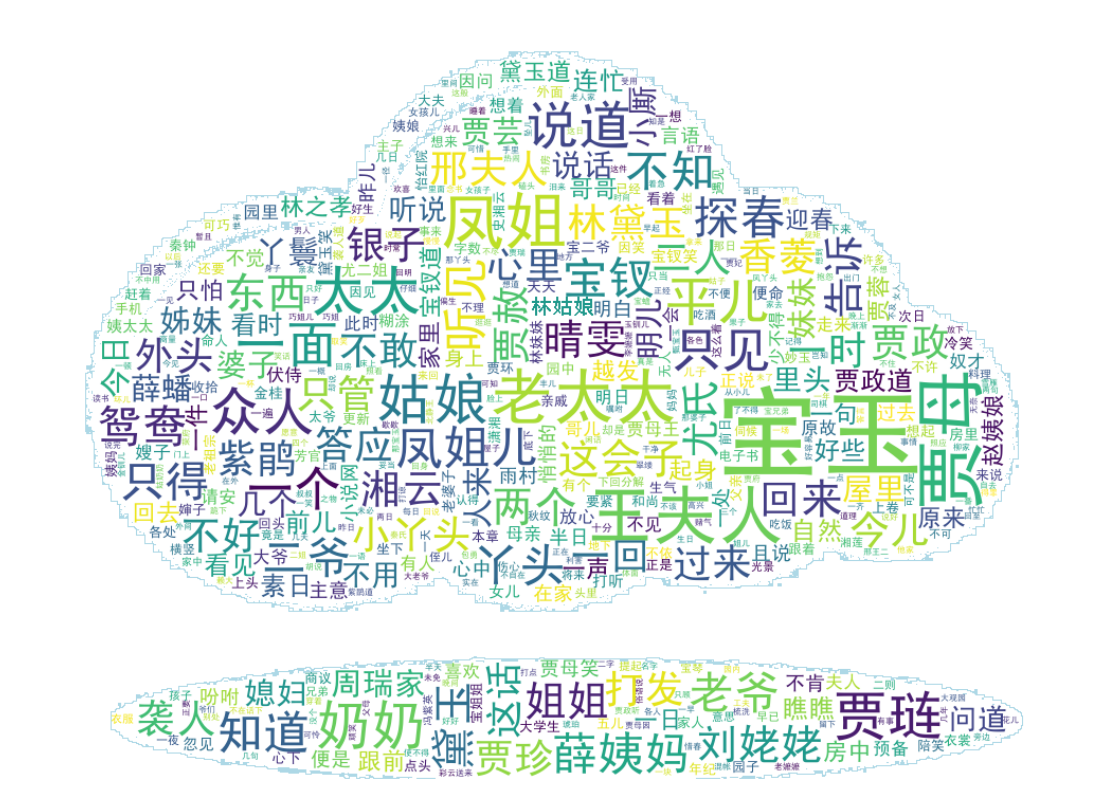

In [45]:
# 可视化展示词云
plt.figure(figsize=(15, 10))  # 设置图片尺寸
plt.imshow(wc, interpolation='bilinear')  # 显示词云对象
plt.axis('off')               # 隐藏坐标轴
plt.show()